### Домашнее задание № 1 по курсу "Прикладные методы математической статистики
Баранова Анастасия Андреевна, группа БПИ196

Вариант 1

In [1]:
import numpy as np
import scipy.stats as st

In [2]:
# Данные выборки:
data = np.array([31, 12, 28, 33, 23, 34, 9, 18, 26, 25, 18, 33, 12, 28, 11, 22, 32, 26, 22, 29])

#### a) Найдем доверительный интервал уровня надежности 0,9 для средней продолжительности вскармливания, считая распределение признака нормальным.

In [82]:
st.t.interval(alpha=0.9, df=data.shape[0] - 1, loc=data.mean(), scale=st.sem(data))

(20.526226279567716, 26.673773720432287)

#### б) Построим график «квантиль-квантиль».

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(8,6)})

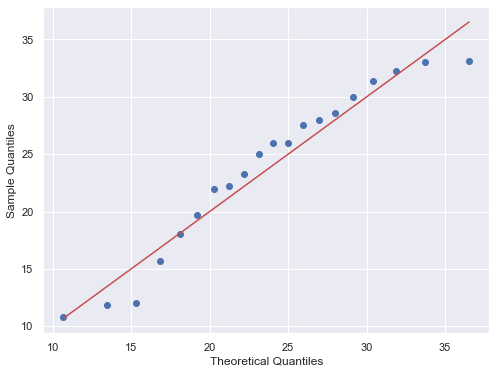

In [5]:
quantiles = np.array(range(1, data.shape[0] + 1)) / (data.shape[0] + 1)
sample_quantiles = np.quantile(a=data, q=quantiles)
norm_quantiles = np.vectorize(lambda x: st.norm.ppf(x, loc=data.mean(), scale=data.std()))(quantiles)

plt.plot(norm_quantiles, sample_quantiles, 'o')
plt.plot(norm_quantiles, norm_quantiles, 'r')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

Можно сделать вывод, что распределение времени вскармливания соответствует нормальному закону.

#### в) Рассчитаем 90% доверительный интервал для средней продолжительности вскармливания, сгенерировав 1000 перевыборок.

In [80]:
means = np.array([np.random.choice(data, size=data.shape[0]).mean() for i in range(1000)])
print('(', np.quantile(means, 0.05), ', ', np.quantile(means, 0.95), ')', sep='')

(20.7975, 26.5525)


#### г) Построим гистограмму для полученных 1000 средних значений. 

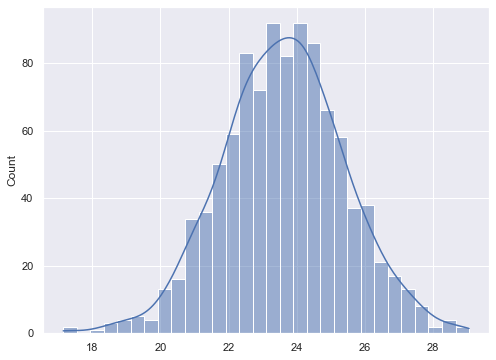

In [81]:
sns.histplot(data=means, bins=30, kde=True)
plt.show()

Можем сделать вывод, что распределение среднего в перевыборках действительно похоже на нормальное.